<a href="https://colab.research.google.com/github/AnaliaLeyez/AnaliaLeyez/blob/main/regresion_polinomica_teor%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

In [ ]:
%matplotlib inline
from IPython.display import HTML

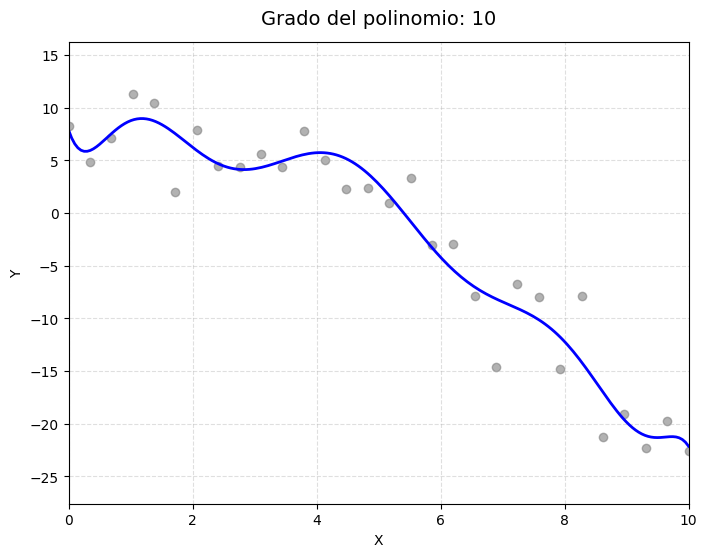

In [ ]:
# ==== 1. Datos simulados ====
np.random.seed(0)
X = np.linspace(0, 10, 30).reshape(-1, 1)
y = 3 + 2 * X.flatten() - 0.5 * X.flatten()**2 + np.random.normal(0, 3, 30)

# ==== 2. Configuración del gráfico ====
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color="gray", alpha=0.6, label="Datos observados")
line, = ax.plot([], [], color="blue", linewidth=2)
title = ax.text(0.5, 1.05, "", ha="center", va="center", transform=ax.transAxes, fontsize=14)
ax.set_xlim(0, 10)
ax.set_ylim(min(y) - 5, max(y) + 5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True, linestyle="--", alpha=0.4)

# ==== 3. Función para cada frame (cada grado) ====
def update(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    X_fit = np.linspace(0, 10, 200).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))
    line.set_data(X_fit.flatten(), y_fit)
    title.set_text(f"Grado del polinomio: {degree}")
    return line, title

# ==== 4. Animación ====
ani = FuncAnimation(fig, update, frames=range(1, 11), interval=800, blit=True, repeat=True)
HTML(ani.to_jshtml())

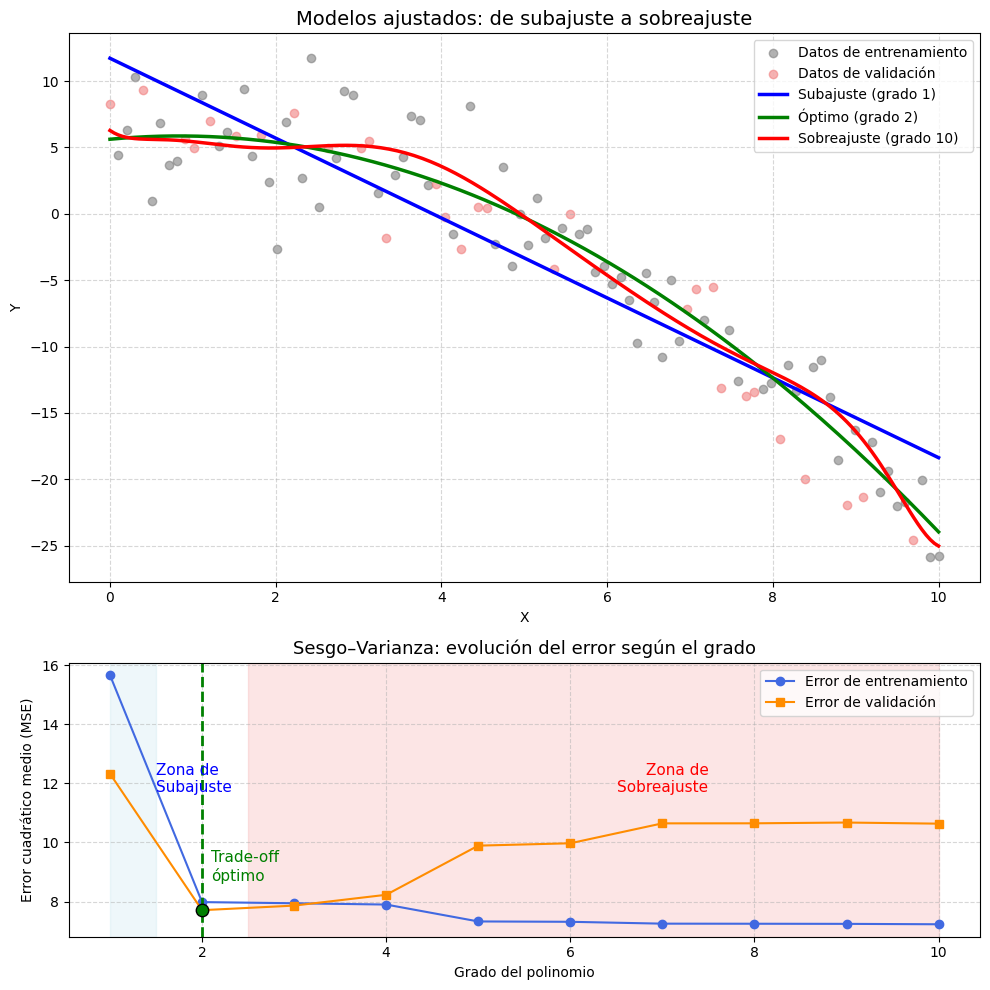

In [ ]:
# ==== 1. Datos simulados ====
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + 2*X.flatten() - 0.5*X.flatten()**2 + np.random.normal(0, 3, 100)

# División entrenamiento / validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ==== 2. Entrenamos distintos grados ====
train_errors = []
val_errors = []
grados = range(1, 11)
predicciones = {}

for degree in grados:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression().fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_errors.append(train_mse)
    val_errors.append(val_mse)

    # Guardamos predicción completa para graficar arriba
    X_fit = np.linspace(0, 10, 200).reshape(-1, 1)
    predicciones[degree] = (X_fit, model.predict(poly.transform(X_fit)))

# ==== 3. Identificamos el punto óptimo ====
optimo_idx = np.argmin(val_errors)
grado_optimo = grados[optimo_idx]
error_optimo = val_errors[optimo_idx]

# ==== 4. Figura combinada ====
fig, axes = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

# ---- Parte superior: formas del modelo ----
ax1 = axes[0]
ax1.scatter(X_train, y_train, color="gray", alpha=0.6, label="Datos de entrenamiento")
ax1.scatter(X_val, y_val, color="lightcoral", alpha=0.6, label="Datos de validación")

# Dibujamos tres curvas: subajuste, óptimo y sobreajuste
for grado, color, label in zip([1, grado_optimo, 10], ["blue", "green", "red"],
                               ["Subajuste (grado 1)", f"Óptimo (grado {grado_optimo})", "Sobreajuste (grado 10)"]):
    X_fit, y_fit = predicciones[grado]
    ax1.plot(X_fit, y_fit, color=color, linewidth=2.5, label=label)

ax1.set_title("Modelos ajustados: de subajuste a sobreajuste", fontsize=14)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.legend()
ax1.grid(True, linestyle="--", alpha=0.5)

# ---- Parte inferior: evolución del error ----
ax2 = axes[1]
ax2.plot(grados, train_errors, marker='o', label='Error de entrenamiento', color='royalblue')
ax2.plot(grados, val_errors, marker='s', label='Error de validación', color='darkorange')

# Zonas y anotaciones
ax2.axvspan(1, grado_optimo-0.5, color='lightblue', alpha=0.2)
ax2.axvspan(grado_optimo+0.5, 10, color='lightcoral', alpha=0.2)
ax2.axvline(grado_optimo, color='green', linestyle='--', linewidth=2)

ax2.text(1.5, max(val_errors)*0.95, "Zona de\nSubajuste", color='blue', fontsize=11, ha='left')
ax2.text(7.5, max(val_errors)*0.95, "Zona de\nSobreajuste", color='red', fontsize=11, ha='right')
ax2.text(grado_optimo+0.1, error_optimo+1, "Trade-off\nóptimo", color='green', fontsize=11, ha='left')

ax2.scatter(grado_optimo, error_optimo, color='green', s=80, edgecolor='black', zorder=5)

ax2.set_title("Sesgo–Varianza: evolución del error según el grado", fontsize=13)
ax2.set_xlabel("Grado del polinomio")
ax2.set_ylabel("Error cuadrático medio (MSE)")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


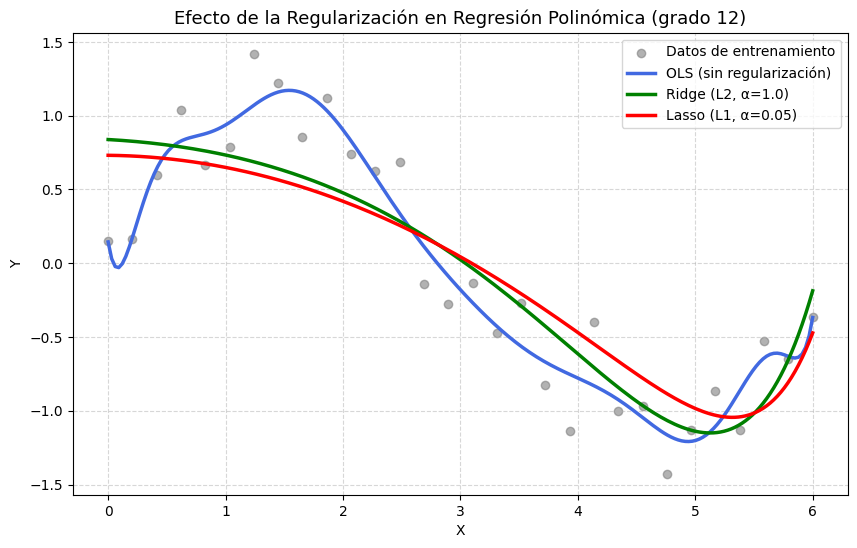

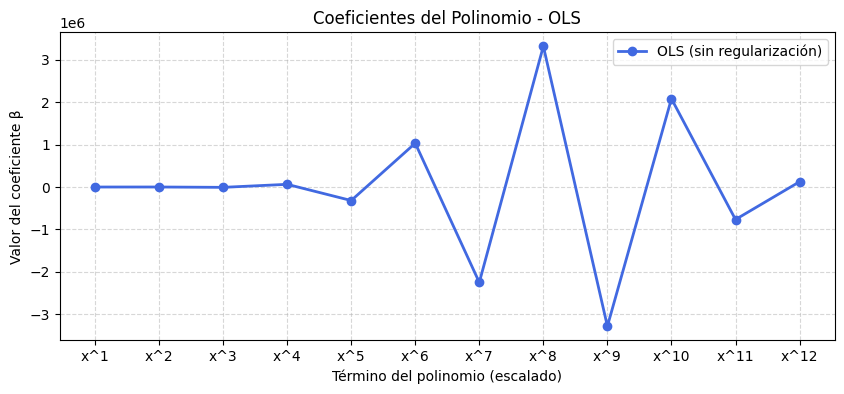

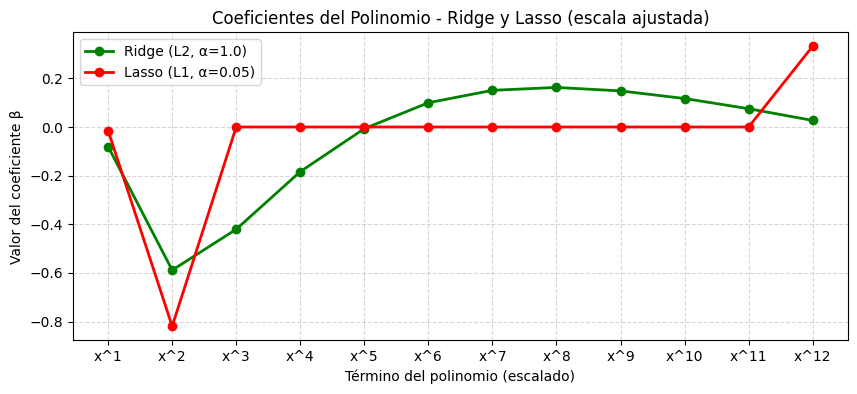

In [ ]:
# ==== 1. Generamos datos ruidosos ====
np.random.seed(42)
X = np.linspace(0, 6, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])  # señal no lineal + ruido

# Puntos suaves para graficar
X_plot = np.linspace(0, 6, 200).reshape(-1, 1)

# ==== 2. Definimos modelos ====
models = [
    ("OLS (sin regularización)", LinearRegression(), "royalblue"),
    ("Ridge (L2, α=1.0)", Ridge(alpha=1.0), "green"),
    ("Lasso (L1, α=0.05)", Lasso(alpha=0.05, max_iter=10000), "red")
]

# ==== 3. Entrenamos y graficamos ajustes ====
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", alpha=0.6, label="Datos de entrenamiento")

coefs = []  # guardamos los coeficientes para la segunda figura

for name, model_base, color in models:
    model = make_pipeline(
        PolynomialFeatures(degree=12, include_bias=False),
        StandardScaler(),  # estandariza las features polinómicas
        model_base
    )
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color=color, linewidth=2.5, label=name)

    # Guardamos los coeficientes del último paso del pipeline
    coefs.append(model.named_steps[list(model.named_steps.keys())[-1]].coef_)

plt.title("Efecto de la Regularización en Regresión Polinómica (grado 12)", fontsize=13)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ==== 4. Gráficos de coeficientes ====
coef_labels = [f"x^{i}" for i in range(1, 13)]
coefs = np.array(coefs)

# --- (a) OLS solo ---
plt.figure(figsize=(10, 4))
plt.plot(range(1, 13), coefs[0].flatten(), marker="o", color="royalblue", linewidth=2, label="OLS (sin regularización)")
plt.xticks(range(1, 13), coef_labels)
plt.title("Coeficientes del Polinomio - OLS")
plt.xlabel("Término del polinomio (escalado)")
plt.ylabel("Valor del coeficiente β")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- (b) Ridge y Lasso (escala ajustada) ---
plt.figure(figsize=(10, 4))
for (name, _, color), coef in zip(models[1:], coefs[1:]):
    plt.plot(range(1, 13), coef.flatten(), marker="o", color=color, linewidth=2, label=name)

plt.xticks(range(1, 13), coef_labels)
plt.title("Coeficientes del Polinomio - Ridge y Lasso (escala ajustada)")
plt.xlabel("Término del polinomio (escalado)")
plt.ylabel("Valor del coeficiente β")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()